Al entregar la solución de este parcial, yo, Rafael Camilo Tejón Rojas con código 201617853 me comprometo a no
conversar durante el desarrollo de este examen con ninguna persona que no sea el profesor del curso, sobre
aspectos relacionados con el parcial; tampoco utilizaré algún medio de comunicación por voz, texto o
intercambio de archivos, para consultar o compartir con otros, información sobre el tema del parcial. Soy
consciente y acepto las consecuencias que acarreará para mi desempeño académico cometer fraude en este
parcial

# Preparación del notebook

In [1]:
!pip install --upgrade pandas-profiling


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, SGDRegressor, ElasticNet
from sklearn.metrics import mean_squared_error, mean_absolute_error

import matplotlib.pyplot as plt
import seaborn as sns

from pandas_profiling import ProfileReport

from cycler import cycler


# Descarga de a DB
plt.rcParams['figure.figsize'] = [15, 9]
sns.set(style="darkgrid")
plt.rcParams['axes.prop_cycle'] = cycler(color='bgrcmyk')

# Lectura de Datos

In [3]:
estate_df = pd.read_csv('https://raw.githubusercontent.com/rctejon/data-science-parcial-1/main/data/losalpes_history.csv', sep = ',')
new_estate_df = pd.read_csv('https://raw.githubusercontent.com/rctejon/data-science-parcial-1/main/data/losalpes_new.csv', sep = ',')

# Utilidades

In [125]:
def histogram(attribute, lower, upper, bins, ylim = None, df=estate_df, serie=None):
  estate_serie = df[attribute]
  if serie is not None:
    estate_serie = serie
  estate_values = []
  for value in estate_serie:
    estate_values.append(value)

  plt.xlim(lower, upper)
  if ylim is not None:
     plt.ylim(0, ylim)
  sns.histplot(data=estate_values, color="skyblue", label = attribute, kde=True, bins = bins)

  plt.legend() 
  plt.show()

In [5]:
estate_df.shape

(102083, 16)

In [6]:
new_estate_df.shape

(513, 14)

In [7]:
estate_df.dtypes

id                       int64
neighbourhood group     object
neighbourhood           object
lat                    float64
long                   float64
country                 object
instant_bookable        object
cancellation_policy     object
room type               object
construction year      float64
price                   object
service fee             object
minimum nights         float64
availability 365       float64
number of reviews      float64
review rate number     float64
dtype: object

In [8]:
new_estate_df.dtypes

id                       int64
neighbourhood group     object
neighbourhood           object
lat                    float64
long                   float64
country                 object
instant_bookable        object
cancellation_policy     object
room type               object
construction year      float64
price                   object
service fee             object
minimum nights         float64
availability 365       float64
dtype: object

In [9]:
estate_df.head(10)

,id,neighbourhood group,neighbourhood,lat,long,country,instant_bookable,cancellation_policy,room type,construction year,price,service fee,minimum nights,availability 365,number of reviews,review rate number
0,48540006,Manhattan,Hell's Kitchen,40.76212,-73.98820,United States,True,strict,Entire home/apt,2011.0,$ 851,$ 170,4.0,199.0,112.0,1.0
1,35079903,Manhattan,Midtown,40.74623,-73.98499,United States,True,flexible,Hotel room,2021.0,$ 466,$ 93,1.0,161.0,13.0,5.0
2,50681273,Manhattan,Upper West Side,40.78859,-73.97568,United States,False,flexible,Private room,2004.0,$ 874,$ 175,14.0,0.0,1.0,2.0
3,13039267,Manhattan,Financial District,40.70817,-74.00511,United States,False,strict,Private room,2012.0,$ 813,$ 163,1.0,0.0,5.0,3.0
4,8998640,Manhattan,Lower East Side,40.72130,-73.98900,United States,True,moderate,Entire home/apt,2007.0,$ 326,$ 65,4.0,301.0,9.0,3.0
5,1629301,Manhattan,Hell's Kitchen,40.75636,-73.99390,United States,True,strict,Entire home/apt,2022.0,$ 786,$ 157,30.0,38.0,32.0,3.0
6,2656579,Manhattan,Greenwich Village,40.73236,-73.99920,United States,False,strict,Entire home/apt,2008.0,$ 863,$ 173,5.0,342.0,13.0,5.0
7,2126371,Manhattan,Morningside Heights,40.80776,-73.96540,United States,True,flexible,Private room,2007.0,$ 749,$ 150,2.0,166.0,233.0,2.0
8,37291864,Brooklyn,Crown Heights,40.67497,-73.94086,United States,True,moderate,Entire home/apt,2004.0,$ 397,$ 79,2.0,0.0,46.0,2.0
9,11288476,Manhattan,Upper West Side,40.79371,-73.96708,United States,True,flexible,Entire home/apt,2009.0,$ 462,$ 92,30.0,250.0,2.0,1.0


In [10]:
new_estate_df.head(10)

,id,neighbourhood group,neighbourhood,lat,long,country,instant_bookable,cancellation_policy,room type,construction year,price,service fee,minimum nights,availability 365
0,27883434,Queens,Ozone Park,40.68432,-73.85862,United States,False,moderate,Private room,2006.0,$ 519,$ 104,1.0,NaN
1,55448727,Manhattan,Civic Center,40.71317,-74.00654,United States,False,moderate,Entire home/apt,2006.0,$ 987,$ 197,2.0,42.0
2,56858749,Queens,East Elmhurst,40.76441,-73.88943,NaN,True,flexible,Private room,2018.0,$ 999,$ 200,2.0,0.0
3,39029953,Manhattan,Gramercy,40.73442,-73.98383,United States,True,strict,Private room,2011.0,$ 497,$ 99,4.0,0.0
4,5567200,Manhattan,Upper West Side,40.79660,-73.97154,United States,True,strict,Entire home/apt,2022.0,$ 820,$ 164,4.0,376.0
5,18931756,Manhattan,Chelsea,40.74222,-73.99444,United States,False,flexible,Entire home/apt,2012.0,"$ 1,11",$ 221,29.0,220.0
6,19445947,Brooklyn,Williamsburg,40.71640,-73.95438,United States,True,moderate,Entire home/apt,2014.0,$ 913,$ 183,7.0,0.0
7,17607892,Queens,Jackson Heights,40.74879,-73.88342,United States,False,flexible,Private room,2008.0,$ 238,$ 48,1.0,5.0
8,46760496,Manhattan,Midtown,40.75287,-73.97352,United States,True,moderate,Private room,2006.0,$ 930,$ 186,3.0,357.0
9,8196700,Manhattan,Midtown,40.74673,-73.98667,United States,False,strict,Private room,2021.0,$ 987,$ 197,1.0,70.0


# Limpieza Basica



*   Se pasara todo a minuscula para evitar duplicados en las columnas categoricas.
*   Se eliminaran espacios al inicio y al final.
*   Se eliminara el simbo dolar de las columnas de precios y se convertiran en flotantes.
*   Las columnas numericas que solo pueden tener valores enteros se castearan a int.
*.  Las columnas con nan de tipo texto se reemplazan conun string vacio y las de tipo numerico con 0.


In [11]:
# Para iniciar con la limpieza se pasaron todos las campos de texto a minusculas y se quitaron cualquier espacio que pueda tener
estate_df['neighbourhood group'] = estate_df['neighbourhood group'].str.lower()
estate_df['neighbourhood group'] = estate_df['neighbourhood group'].str.strip()
estate_df['neighbourhood'] = estate_df['neighbourhood'].str.lower()
estate_df['neighbourhood'] = estate_df['neighbourhood'].str.strip()
estate_df['country'] = estate_df['country'].str.lower()
estate_df['country'] = estate_df['country'].str.strip()
estate_df['room type'] = estate_df['room type'].str.lower()
estate_df['room type'] = estate_df['room type'].str.strip()
estate_df['cancellation_policy'] = estate_df['cancellation_policy'].str.lower()

new_estate_df['neighbourhood group'] = new_estate_df['neighbourhood group'].str.lower()
new_estate_df['neighbourhood group'] = new_estate_df['neighbourhood group'].str.strip()
new_estate_df['neighbourhood'] = new_estate_df['neighbourhood'].str.lower()
new_estate_df['neighbourhood'] = new_estate_df['neighbourhood'].str.strip()
new_estate_df['country'] = new_estate_df['country'].str.lower()
new_estate_df['country'] = new_estate_df['country'].str.strip()
new_estate_df['room type'] = new_estate_df['room type'].str.lower()
new_estate_df['room type'] = new_estate_df['room type'].str.strip()
new_estate_df['cancellation_policy'] = new_estate_df['cancellation_policy'].str.lower()


In [12]:
estate_df['neighbourhood group'] = estate_df['neighbourhood group'].fillna('')
estate_df['neighbourhood'] = estate_df['neighbourhood'].fillna('')
estate_df['country'] = estate_df['country'].fillna('')
estate_df['room type'] = estate_df['room type'].fillna('')
estate_df['cancellation_policy'] = estate_df['cancellation_policy'].fillna('')
estate_df['instant_bookable'] = estate_df['instant_bookable'].fillna(0)

new_estate_df['neighbourhood group'] = new_estate_df['neighbourhood group'].fillna('')
new_estate_df['neighbourhood'] = new_estate_df['neighbourhood'].fillna('')
new_estate_df['country'] = new_estate_df['country'].fillna('')
new_estate_df['room type'] = new_estate_df['room type'].fillna('')
new_estate_df['cancellation_policy'] = new_estate_df['cancellation_policy'].fillna('')
new_estate_df['instant_bookable'] = new_estate_df['instant_bookable'].fillna(0)

In [13]:
# Se convierte las columnas con precios de texto a flotante
def money_str_to_float(x):
    x = str(x).replace('$', '')
    x = x.replace(',', '.') 
    return float(x.strip())

estate_df['price'] = estate_df['price'].apply(money_str_to_float)
estate_df['service fee'] = estate_df['service fee'].apply(money_str_to_float)

estate_df['price'] = estate_df['price'].fillna(0)
estate_df['service fee'] = estate_df['service fee'].fillna(0)

new_estate_df['price'] = new_estate_df['price'].apply(money_str_to_float)
new_estate_df['service fee'] = new_estate_df['service fee'].apply(money_str_to_float)

new_estate_df['price'] = new_estate_df['price'].fillna(0)
new_estate_df['service fee'] = new_estate_df['service fee'].fillna(0)

In [14]:
estate_df['construction year'] = estate_df['construction year'].fillna(0)
estate_df['construction year'] = estate_df['construction year'].astype(int)

estate_df['minimum nights'] = estate_df['minimum nights'].fillna(0)
estate_df['minimum nights'] = estate_df['minimum nights'].astype(int)

estate_df['availability 365'] = estate_df['availability 365'].fillna(0)
estate_df['availability 365'] = estate_df['availability 365'].astype(int)

estate_df = estate_df[estate_df['number of reviews'].notna()]

new_estate_df['construction year'] = new_estate_df['construction year'].fillna(0)
new_estate_df['construction year'] = new_estate_df['construction year'].astype(int)

new_estate_df['minimum nights'] = new_estate_df['minimum nights'].fillna(0)
new_estate_df['minimum nights'] = new_estate_df['minimum nights'].astype(int)

new_estate_df['availability 365'] = new_estate_df['availability 365'].fillna(0)
new_estate_df['availability 365'] = new_estate_df['availability 365'].astype(int)

In [15]:
estate_df.head(10)

,id,neighbourhood group,neighbourhood,lat,long,country,instant_bookable,cancellation_policy,room type,construction year,price,service fee,minimum nights,availability 365,number of reviews,review rate number
0,48540006,manhattan,hell's kitchen,40.76212,-73.98820,united states,True,strict,entire home/apt,2011,851.0,170.0,4,199,112.0,1.0
1,35079903,manhattan,midtown,40.74623,-73.98499,united states,True,flexible,hotel room,2021,466.0,93.0,1,161,13.0,5.0
2,50681273,manhattan,upper west side,40.78859,-73.97568,united states,False,flexible,private room,2004,874.0,175.0,14,0,1.0,2.0
3,13039267,manhattan,financial district,40.70817,-74.00511,united states,False,strict,private room,2012,813.0,163.0,1,0,5.0,3.0
4,8998640,manhattan,lower east side,40.72130,-73.98900,united states,True,moderate,entire home/apt,2007,326.0,65.0,4,301,9.0,3.0
5,1629301,manhattan,hell's kitchen,40.75636,-73.99390,united states,True,strict,entire home/apt,2022,786.0,157.0,30,38,32.0,3.0
6,2656579,manhattan,greenwich village,40.73236,-73.99920,united states,False,strict,entire home/apt,2008,863.0,173.0,5,342,13.0,5.0
7,2126371,manhattan,morningside heights,40.80776,-73.96540,united states,True,flexible,private room,2007,749.0,150.0,2,166,233.0,2.0
8,37291864,brooklyn,crown heights,40.67497,-73.94086,united states,True,moderate,entire home/apt,2004,397.0,79.0,2,0,46.0,2.0
9,11288476,manhattan,upper west side,40.79371,-73.96708,united states,True,flexible,entire home/apt,2009,462.0,92.0,30,250,2.0,1.0


In [16]:
new_estate_df.head(10)

,id,neighbourhood group,neighbourhood,lat,long,country,instant_bookable,cancellation_policy,room type,construction year,price,service fee,minimum nights,availability 365
0,27883434,queens,ozone park,40.68432,-73.85862,united states,False,moderate,private room,2006,519.00,104.0,1,0
1,55448727,manhattan,civic center,40.71317,-74.00654,united states,False,moderate,entire home/apt,2006,987.00,197.0,2,42
2,56858749,queens,east elmhurst,40.76441,-73.88943,,True,flexible,private room,2018,999.00,200.0,2,0
3,39029953,manhattan,gramercy,40.73442,-73.98383,united states,True,strict,private room,2011,497.00,99.0,4,0
4,5567200,manhattan,upper west side,40.79660,-73.97154,united states,True,strict,entire home/apt,2022,820.00,164.0,4,376
5,18931756,manhattan,chelsea,40.74222,-73.99444,united states,False,flexible,entire home/apt,2012,1.11,221.0,29,220
6,19445947,brooklyn,williamsburg,40.71640,-73.95438,united states,True,moderate,entire home/apt,2014,913.00,183.0,7,0
7,17607892,queens,jackson heights,40.74879,-73.88342,united states,False,flexible,private room,2008,238.00,48.0,1,5
8,46760496,manhattan,midtown,40.75287,-73.97352,united states,True,moderate,private room,2006,930.00,186.0,3,357
9,8196700,manhattan,midtown,40.74673,-73.98667,united states,False,strict,private room,2021,987.00,197.0,1,70


# Perfilación de datos

In [17]:
# profile_history = ProfileReport(estate_df)
# profile_history.to_notebook_iframe()
# profile_history.to_file('report.html')

In [18]:
# profile_news = ProfileReport(new_estate_df)
# profile_news.to_notebook_iframe()
# profile_news.to_file('report.html')

En ambos dtaframes se encontraron duplicados, entonces procedere a borrar todos los que tengan el mismo id (Que deberia ser unico) y me quedare con el primero

In [19]:
new_estate_df = new_estate_df.drop_duplicates(subset=['id'])
estate_df = estate_df.drop_duplicates(subset=['id'])

# Limpieza por atributo

## Neighbourhood Group

In [20]:
groups = estate_df['neighbourhood group'].unique()
groups

array(['manhattan', 'brooklyn', 'queens', 'bronx', 'staten island',
       'quens', '', 'manattan', 'broolkyn', 'manhatan', 'brookln'],
      dtype=object)

Se observa que existen registros con typos, para las cuales se corregira al nombre más cercano. Por otro lado, existen registros vacios, para los cuales se decidira no cambiar debido a que no es facil saber a donde pertenece.

In [21]:
estate_df['neighbourhood group'] = estate_df['neighbourhood group'].replace('manattan', 'manhattan')
estate_df['neighbourhood group'] = estate_df['neighbourhood group'].replace('manhatan', 'manhattan')
estate_df['neighbourhood group'] = estate_df['neighbourhood group'].replace('broolkyn', 'brooklyn')
estate_df['neighbourhood group'] = estate_df['neighbourhood group'].replace('brookln', 'brooklyn')
estate_df['neighbourhood group'] = estate_df['neighbourhood group'].replace('quens', 'queens')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [22]:
groups = estate_df['neighbourhood group'].unique()
groups

array(['manhattan', 'brooklyn', 'queens', 'bronx', 'staten island', ''],
      dtype=object)

In [23]:
groups_news = new_estate_df['neighbourhood group'].unique()
groups_news

array(['queens', 'manhattan', 'brooklyn', 'bronx', 'staten island', ''],
      dtype=object)

No se encontraron problemas en este código 

Esto se podria ser muy importante para predecir la popularidad de un inmueble por lo que se convertir a valores numericos para ser utilizado en el modelo

In [24]:
for i, group in enumerate(groups):
  estate_df['neighbourhood group'] = estate_df['neighbourhood group'].replace(group, i)
  new_estate_df['neighbourhood group'] = new_estate_df['neighbourhood group'].replace(group, i)

## Neighbourhood

In [25]:
neighbourhoods = estate_df['neighbourhood'].unique()
neighbourhoods

array(["hell's kitchen", 'midtown', 'upper west side',
       'financial district', 'lower east side', 'greenwich village',
       'morningside heights', 'crown heights', 'astoria', 'clinton hill',
       'harlem', 'bushwick', 'washington heights',
       'prospect-lefferts gardens', 'prospect heights', 'east village',
       'bath beach', 'brooklyn heights', 'borough park',
       'bedford-stuyvesant', 'upper east side', 'wakefield',
       'windsor terrace', 'williamsburg', 'flatbush', 'kew gardens',
       'west village', 'flatlands', 'bay ridge', 'east new york',
       'kips bay', 'st. albans', 'st. george', 'forest hills', 'gramercy',
       'glendale', 'dongan hills', 'far rockaway', 'park slope',
       'greenpoint', 'concourse', 'little italy', 'elmhurst', 'chelsea',
       'east harlem', 'kingsbridge', 'arverne', 'sunset park',
       'south slope', 'nolita', 'east flatbush', 'murray hill',
       'boerum hill', 'ridgewood', 'coney island', 'gowanus',
       'bensonhurst', 'c

In [26]:
neighbourhoods_new = new_estate_df['neighbourhood'].unique()
neighbourhoods_new

array(['ozone park', 'civic center', 'east elmhurst', 'gramercy',
       'upper west side', 'chelsea', 'williamsburg', 'jackson heights',
       'midtown', 'lower east side', 'harlem', 'roosevelt island',
       'bensonhurst', 'flatbush', 'bushwick', 'washington heights',
       'kensington', 'ridgewood', 'boerum hill', 'east harlem',
       'east new york', 'bedford-stuyvesant', 'kips bay', 'astoria',
       'crown heights', 'inwood', 'east village', 'upper east side',
       "hell's kitchen", 'prospect heights', 'red hook', 'corona',
       'windsor terrace', 'west village', 'kingsbridge',
       'springfield gardens', 'east flatbush', 'park slope',
       'murray hill', 'greenpoint', 'tribeca', 'battery park city',
       'chinatown', 'mott haven', 'fort greene', 'brooklyn heights',
       'financial district', 'theater district', 'clinton hill',
       'riverdale', 'st. albans', 'cypress hills', 'long island city',
       'jamaica', 'prospect-lefferts gardens', 'sunnyside', 'pelham

A simple vista no se ven problemas con esta columna

## Country

In [27]:
countries = estate_df['country'].unique()
countries

array(['united states', '', 'united states of america'], dtype=object)

In [28]:
estate_df = estate_df.drop(columns = ['country'])

In [29]:
countries_new = new_estate_df['country'].unique()
countries_new

array(['united states', ''], dtype=object)

In [30]:
new_estate_df = new_estate_df.drop(columns = ['country'])

Debido a que solo existe un pais se borrara esta columna. (Se puede asumir que es solo una porque son variaciones de lo mismo o es texto vacio)

## Cancellation Policy

In [31]:
cancellation_policies	 = estate_df['cancellation_policy'].unique()
cancellation_policies

array(['strict', 'flexible', 'moderate', ''], dtype=object)

In [32]:
cancellation_policies_new	 = new_estate_df['cancellation_policy'].unique()
cancellation_policies_new

array(['moderate', 'flexible', 'strict', ''], dtype=object)

In [33]:
estate_df['cancellation_policy'] = estate_df['cancellation_policy'].replace('', -1000)
new_estate_df['cancellation_policy'] = new_estate_df['cancellation_policy'].replace('', -1000)
for i, policy in enumerate(cancellation_policies):
  estate_df['cancellation_policy'] = estate_df['cancellation_policy'].replace(policy, i)
  new_estate_df['cancellation_policy'] = new_estate_df['cancellation_policy'].replace(policy, i)

## Room Type

In [34]:
room_types = estate_df['room type'].unique()
room_types

array(['entire home/apt', 'hotel room', 'private room', 'shared room'],
      dtype=object)

In [35]:
room_types_new = new_estate_df['room type'].unique()
room_types_new

array(['private room', 'entire home/apt', 'shared room', 'hotel room', ''],
      dtype=object)

In [36]:
estate_df['room type'] = estate_df['room type'].replace('', -1000)
new_estate_df['room type'] = new_estate_df['room type'].replace('', -1000)
for i, room_type in enumerate(room_types):
  estate_df['room type'] = estate_df['room type'].replace(room_type, i)
  new_estate_df['room type'] = new_estate_df['room type'].replace(room_type, i)

## Construction Year

In [37]:
years = estate_df['construction year'].unique()
years.sort()
years

array([   0, 1020, 1022, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021,
       2022])

Para este caso no tiene sentido años menores al 1700, por lo que 1020 y 1022 porque son casas en USA, deben ser typos de 2020 y 2022 respectivamente, para los valores de 0 se reemplazaran con 2012 debido a que es el años más cercano al promedio de los datos que tienen sentido.

In [38]:
estate_df['construction year'] = estate_df['construction year'].replace(0, 2012)
estate_df['construction year'] = estate_df['construction year'].replace(1020, 2020)
estate_df['construction year'] = estate_df['construction year'].replace(1020, 2022)

In [39]:
years_new = new_estate_df['construction year'].unique()
years_new.sort()
years_new

array([   0, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012,
       2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022])

Para este caso no tiene sentido años menores al 1900, por lo que los valores de 0 se reemplazaran con 2012 debido a que es el años más cercano al promedio de los datos que tienen sentido.

In [40]:
new_estate_df['construction year'] = new_estate_df['construction year'].replace(0, 2012)

## Price

In [41]:
prices_serie = estate_df['price']
min_price = prices_serie.quantile(0)
median_price = prices_serie.quantile(0.5)
average_price = prices_serie.mean()
max_price = prices_serie.quantile(1)
print(f'Min: {min_price} Median: {median_price} Average: {average_price} Max : {max_price}')

Min: -611.0 Median: 425.0 Average: 434.5257448180745 Max : 254000.0


AL ser precios de arriendo por noche un arriendo de más de 20000 dolares en mi opinion es exagerado porque se estaria acercando al precio de venta de muchos inmuebles, ademas no tiene sntido precios negativos por lo cual se hara un valor absuluto y luego se limitara el rango de 0 a 20000

In [42]:
estate_df['price'] = estate_df['price'].abs()
estate_df['price'] = estate_df['price'].clip(0, 20000)

In [43]:
prices_serie = estate_df['price']
min_price = prices_serie.quantile(0)
median_price = prices_serie.quantile(0.5)
average_price = prices_serie.mean()
max_price = prices_serie.quantile(1)
print(f'Min: {min_price} Median: {median_price} Average: {average_price} Max : {max_price}')

Min: 0.0 Median: 425.0 Average: 432.2160497306093 Max : 20000.0


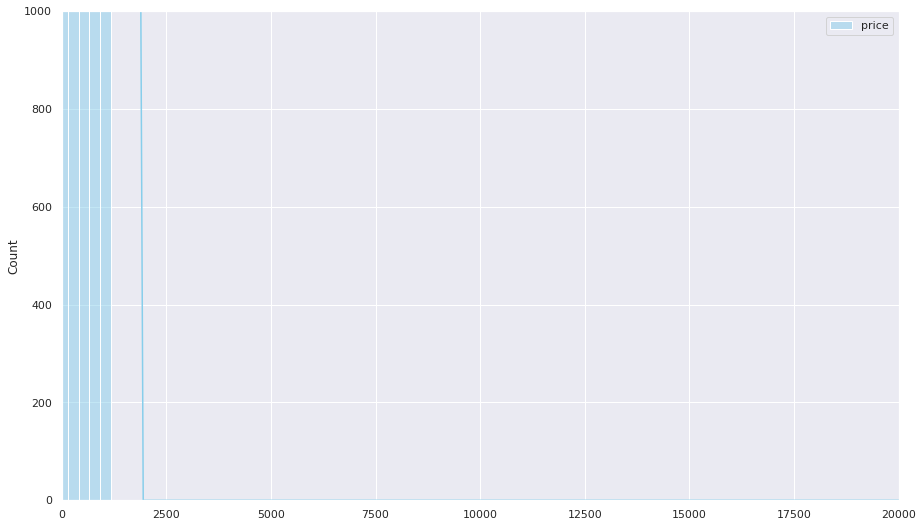

In [44]:
histogram('price', min_price, max_price, 1000, ylim=1000)

Se sigue observando que no existen casi inmuebles con precios mayores a 1000 por lo que se limitara mas el rango

In [45]:
estate_df['price'] = estate_df['price'].clip(0, 1000)

In [46]:
prices_serie = estate_df['price']
min_price = prices_serie.quantile(0)
median_price = prices_serie.quantile(0.5)
average_price = prices_serie.mean()
max_price = prices_serie.quantile(1)
print(f'Min: {min_price} Median: {median_price} Average: {average_price} Max : {max_price}')

Min: 0.0 Median: 425.0 Average: 432.02752587241895 Max : 1000.0


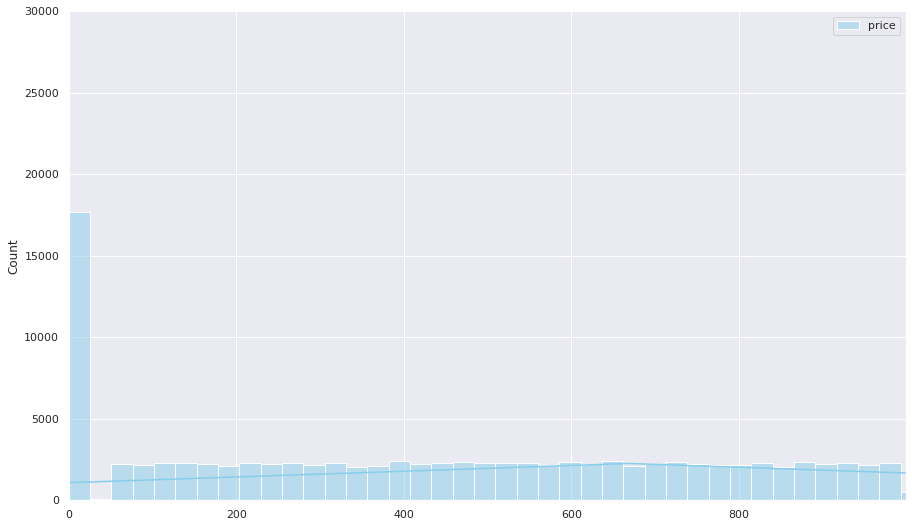

In [119]:
histogram('price', min_price, max_price, 10000, ylim=30000)

In [48]:
new_estate_df['price'] = new_estate_df['price'].abs()
new_estate_df['price'] = new_estate_df['price'].clip(0, 1000)

In [49]:
prices_serie = new_estate_df['price']
min_price = prices_serie.quantile(0)
median_price = prices_serie.quantile(0.5)
average_price = prices_serie.mean()
max_price = prices_serie.quantile(1)
print(f'Min: {min_price} Median: {median_price} Average: {average_price} Max : {max_price}')

Min: 0.0 Median: 401.0 Average: 417.4153606237817 Max : 999.0


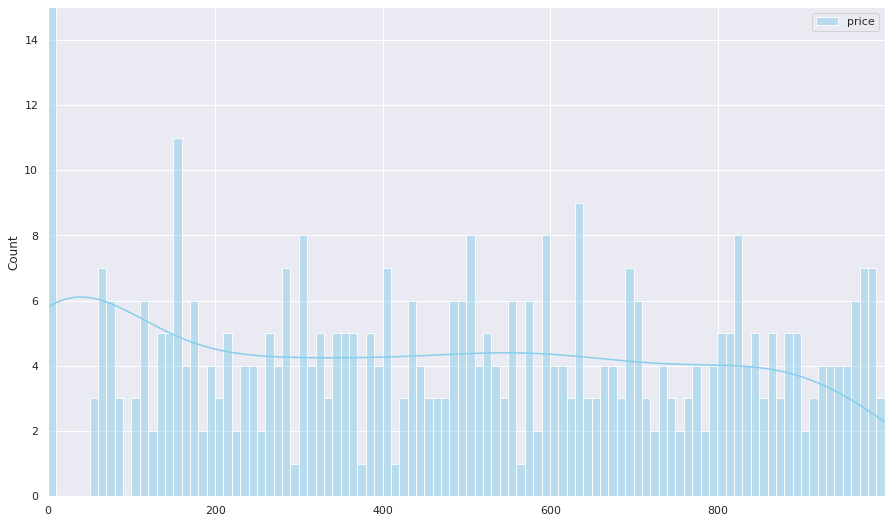

In [50]:
histogram('price', min_price, max_price, 100, ylim=15, df=new_estate_df)

Se haran las mismas transformaciones para los precios de los inmuebles nuevos

## Service Fee

In [51]:
fee_serie = estate_df['service fee']
min_fee = fee_serie.quantile(0)
median_fee = fee_serie.quantile(0.5)
average_fee = fee_serie.mean()
max_fee = fee_serie.quantile(1)
print(f'Min: {min_fee} Median: {median_fee} Average: {average_fee} Max : {max_fee}')

Min: -193.0 Median: 124.0 Average: 125.87755871525953 Max : 122000.0


In [52]:
estate_df['service fee'] = estate_df['service fee'].abs()
estate_df['service fee'] = estate_df['service fee'].clip(0, 500)

In [53]:
new_estate_df['service fee'] = new_estate_df['service fee'].abs()
new_estate_df['service fee'] = new_estate_df['service fee'].clip(0, 500)

No tienen sentido service fees de más de 500 dolaresn ni menores a 0 por lo que se hara valor absoluto y luego clip

In [54]:
fee_serie = estate_df['service fee']
min_fee = fee_serie.quantile(0)
median_fee = fee_serie.quantile(0.5)
average_fee = fee_serie.mean()
max_fee = fee_serie.quantile(1)
print(f'Min: {min_fee} Median: {median_fee} Average: {average_fee} Max : {max_fee}')

Min: 0.0 Median: 124.0 Average: 124.6758282646875 Max : 500.0


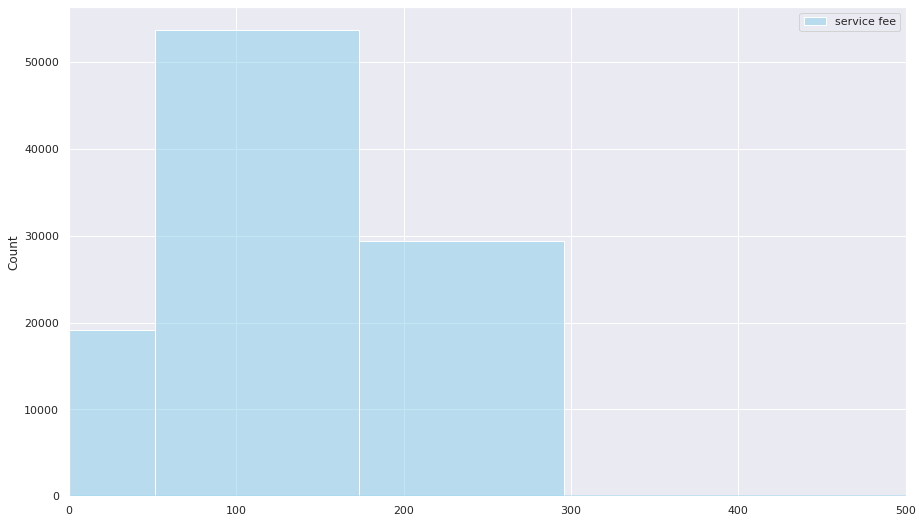

In [120]:
histogram('service fee', min_fee, max_fee, 1000)

## Minimum Nights

In [56]:
nights_serie = estate_df['minimum nights']
min_nights = nights_serie.quantile(0)
median_nights = nights_serie.quantile(0.5)
average_nights = nights_serie.mean()
max_nights = nights_serie.quantile(1)
print(f'Min: {min_nights} Median: {median_nights} Average: {average_nights} Max : {max_nights}')

Min: -1223.0 Median: 3.0 Average: 8.115217844279293 Max : 5645.0


No tiene sentido que una persona se quede ni dias negativos ni que haya reserva de mas de 1 año por lo cual se volvera a hacer valor absoluto y se limitara entre 1 y 365

In [57]:
estate_df['minimum nights'] = estate_df['minimum nights'].abs()
estate_df['minimum nights'] = estate_df['minimum nights'].clip(0, 365)

In [58]:
new_estate_df['minimum nights'] = new_estate_df['minimum nights'].abs()
new_estate_df['minimum nights'] = new_estate_df['minimum nights'].clip(1, 365)

In [59]:
nights_serie = estate_df['minimum nights']
min_nights = nights_serie.quantile(0)
median_nights = nights_serie.quantile(0.5)
average_nights = nights_serie.mean()
max_nights = nights_serie.quantile(1)
print(f'Min: {min_nights} Median: {median_nights} Average: {average_nights} Max : {max_nights}')

Min: 0.0 Median: 3.0 Average: 7.966105394759037 Max : 365.0


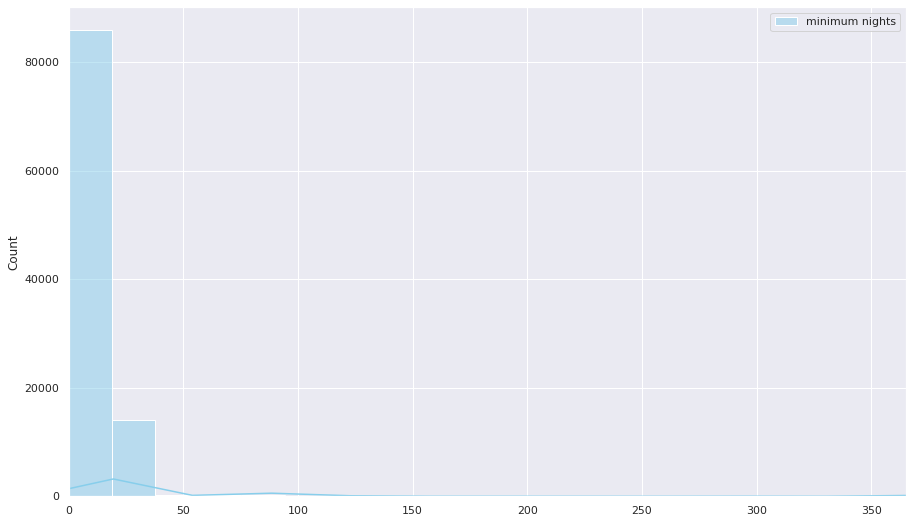

In [60]:
histogram('minimum nights', min_nights, max_nights, int(max_nights))

## Availability 365

In [61]:
availability_serie = estate_df['availability 365']
min_availability = availability_serie.quantile(0)
median_availability = availability_serie.quantile(0.5)
average_availability = availability_serie.mean()
max_availability = availability_serie.quantile(1)
print(f'Min: {min_availability} Median: {median_availability} Average: {average_availability} Max : {max_availability}')

Min: -10.0 Median: 95.0 Average: 140.44475754839607 Max : 3677.0


Este valor tienen que estar entre 0 y 365 dias

In [62]:
estate_df['availability 365'] = estate_df['availability 365'].abs()
estate_df['availability 365'] = estate_df['availability 365'].clip(0, 365)

new_estate_df['availability 365'] = new_estate_df['availability 365'].abs()
new_estate_df['availability 365'] = new_estate_df['availability 365'].clip(0, 365)

In [63]:
availability_serie = estate_df['availability 365']
min_availability = availability_serie.quantile(0)
median_availability = availability_serie.quantile(0.5)
average_availability = availability_serie.mean()
max_availability = availability_serie.quantile(1)
print(f'Min: {min_availability} Median: {median_availability} Average: {average_availability} Max : {max_availability}')

Min: 0.0 Median: 95.0 Average: 139.62659377077483 Max : 365.0


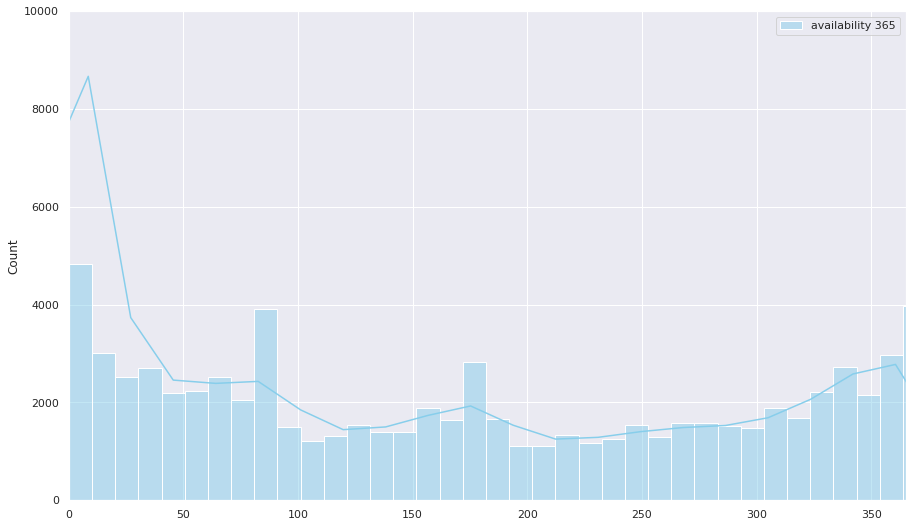

In [121]:
histogram('availability 365', min_availability, max_availability, int(max_availability), ylim = 10000)

## Number of Reviews

In [65]:
reviews_serie = estate_df['number of reviews']
min_reviews = reviews_serie.quantile(0)
median_reviews = reviews_serie.quantile(0.5)
average_reviews = reviews_serie.mean()
max_reviews = reviews_serie.quantile(1)
print(f'Min: {min_reviews} Median: {median_reviews} Average: {average_reviews} Max : {max_reviews}')

Min: 0.0 Median: 7.0 Average: 27.453102209698063 Max : 1024.0


NO pareciera que estos datos tuvieran algo muy raro que corregir

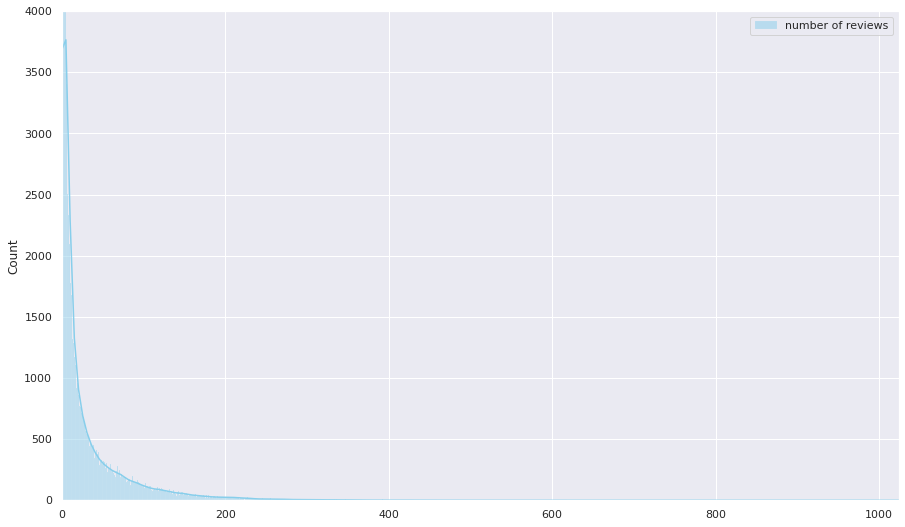

In [66]:
histogram('number of reviews', min_reviews, max_reviews, int(max_reviews), ylim= 4000)

## Review Rate Number

In [67]:
rate_serie = estate_df['review rate number']
min_rate = rate_serie.quantile(0)
median_rate = rate_serie.quantile(0.5)
average_rate = rate_serie.mean()
max_rate = rate_serie.quantile(1)
print(f'Min: {min_rate} Median: {median_rate} Average: {average_rate} Max : {max_rate}')

Min: 1.0 Median: 3.0 Average: 3.278831128760961 Max : 5.0


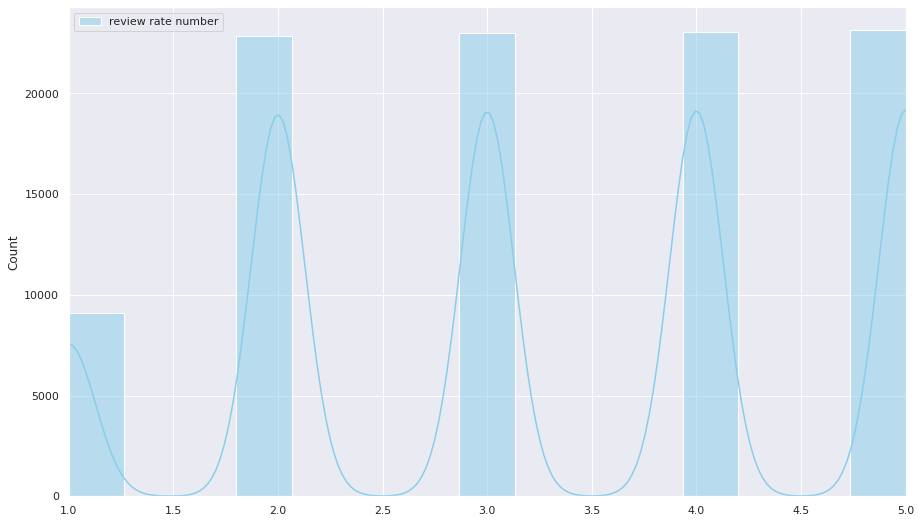

In [68]:
histogram('review rate number', min_rate, max_rate, 15)

Lo mismo, no pareciera que estos tuvieran datos muy raros


## Latitude

In [69]:
lat_serie = estate_df['lat']
min_lat = lat_serie.quantile(0)
median_lat = lat_serie.quantile(0.5)
average_lat = lat_serie.mean()
max_lat = lat_serie.quantile(1)
print(f'Min: {min_lat} Median: {median_lat} Average: {average_lat} Max : {max_lat}')

Min: 40.49979 Median: 40.72226 Average: 40.728071930640525 Max : 40.91697


El unico problema que se ve en este atributo son los nan, se reemplazaran con un valor cercano al promedio

In [70]:
estate_df['lat'] = estate_df['lat'].fillna(40.70)
new_estate_df['lat'] = new_estate_df['lat'].fillna(40.70)

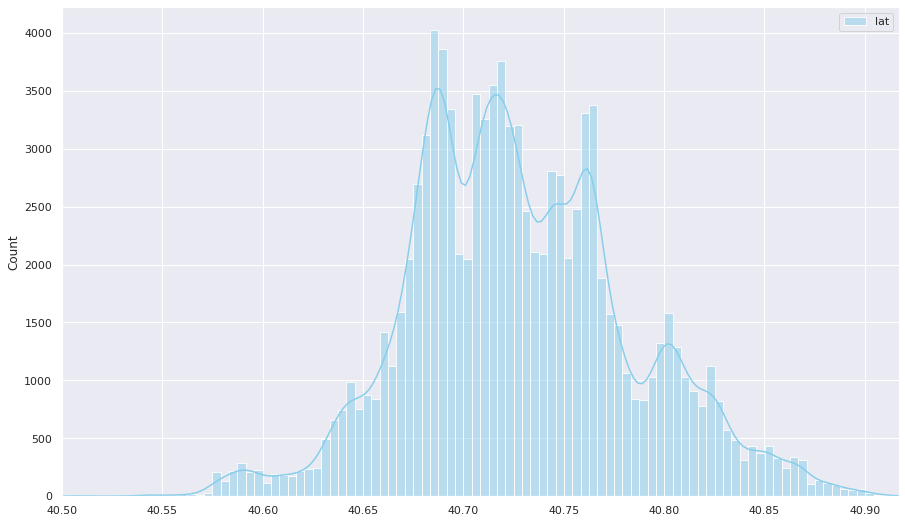

In [71]:
histogram('lat', min_lat, max_lat, 100)

## Longitude

In [72]:
long_serie = estate_df['long']
min_long = long_serie.quantile(0)
median_long = long_serie.quantile(0.5)
average_long = long_serie.mean()
max_long = long_serie.quantile(1)
print(f'Min: {min_long} Median: {median_long} Average: {average_long} Max : {max_long}')

Min: -74.24984 Median: -73.95458 Average: -73.9498317017261 Max : -73.70522


El unico problema que se ve en este atributo son los nan, se reemplazaran con un valor cercano al promedio

In [73]:
estate_df['long'] = estate_df['long'].fillna(-73.95)
new_estate_df['long'] = new_estate_df['long'].fillna(-73.95)

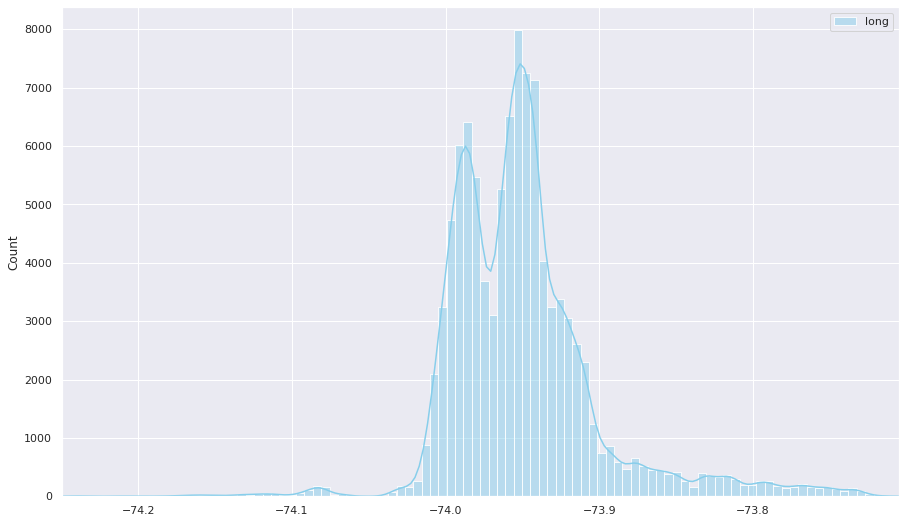

In [74]:
histogram('long', min_long, max_long, 100)

## instant_bookable

In [75]:
instant_bookables = estate_df['instant_bookable'].unique()
instant_bookables

array([True, False], dtype=object)

In [76]:
instant_bookables_new = new_estate_df['instant_bookable'].unique()
instant_bookables_new

array([False, True], dtype=object)

Esto se podria utilizar para entrenar el modelo, por lo que se reemplara los false con -1 y los true con 1

In [77]:
estate_df['instant_bookable'] = estate_df['instant_bookable'].replace(False, -1)
estate_df['instant_bookable'] = estate_df['instant_bookable'].replace(True, 1)

new_estate_df['instant_bookable'] = new_estate_df['instant_bookable'].replace(False, -1)
new_estate_df['instant_bookable'] = new_estate_df['instant_bookable'].replace(True, 1)

A simple vista no se ven problemas con esta columna

Profe se hizo lo que se pudo para poner grafiquitas y eso, pero es re largo, entonces la limpieza queda asi jejeje


# Model


Para crear el modelo lo primero que se observa es que queremos predecir la cantidad de reviews que tiene un inmueble, posteriormente definiremos el primer set de feature que seran, el año, el precio, los servicios, la disponibilidad y si es reservable al momento o no. 

## Feature Defining

In [78]:
features = ['construction year', 'price', 'service fee', 'availability 365', 'instant_bookable']

## Splitting train and test datasets

In [79]:
X = estate_df[features]
Y = estate_df['number of reviews']

In [80]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 1)

In [81]:
X_train.shape

(80626, 5)

In [82]:
X_test.shape

(20157, 5)

### Training the model

Para iniciar se utilizara un modelo de regresión lineal con los parametros por defecto.

In [83]:
regr = LinearRegression()

In [84]:
regr.fit(X_train, Y_train)

LinearRegression()

In [85]:
regr.coef_

array([0.01777423, 0.00028129, 0.0031794 , 0.03526555, 0.15053171])

In [86]:
regr.intercept_

-13.699987289282188

In [87]:
preds_train = regr.predict(X_train)
preds_test = regr.predict(X_test)

In [88]:
np.sqrt(mean_squared_error(Y_train, preds_train)), np.sqrt(mean_squared_error(Y_test, preds_test))

(49.480020312277, 48.57442056388855)

Aqui podemos ver que tenemos un error muy alto puesto que los valores de la variable objetivo tiene un promedio de 27, por lo que equivocarnos en 50 seria catastrofico para el negocio.

## Polynomial Transformation

Buscando mejorar el modelo anterior transformaremos los datos de manera polinomial y se hara una regresión sobre esos modelos(Lo que seria equivalente a hacer un modelo polinomial) 
Se escogio una transformación polinomial de grado 5 para probar

In [89]:
from sklearn.preprocessing import PolynomialFeatures

X_poly_5 = PolynomialFeatures(degree=5, include_bias=False).fit_transform(X)
regr_poly_5 = LinearRegression()

X_train_poly_5, X_test_poly_5, Y_train_poly_5, Y_test_poly_5 = train_test_split(X_poly_5, Y, test_size = 0.2, random_state = 1)

regr_poly_5.fit(X_train_poly_5, Y_train_poly_5)

LinearRegression()

In [90]:
regr_poly_5.coef_

array([ 5.17267101e-11, -1.32899481e-05, -2.94149152e-06, -6.37639956e-06,
       -2.29581291e-06, -3.10264950e-03, -5.73001375e-03, -1.32045113e-03,
       -2.02641223e-03,  1.72298174e-05, -5.53620464e-03, -1.11404887e-03,
       -9.82741414e-04, -3.08555605e-05, -2.40828008e-04, -2.06518779e-04,
        1.83257193e-06, -1.43679852e-04, -1.62335025e-04,  2.26052197e-06,
       -9.66026807e-06,  2.40953864e-04, -9.42664226e-06, -3.90510222e-04,
        9.27069114e-03, -9.53239406e-04, -5.46151634e-04, -1.63554676e-03,
       -1.99495212e-02,  1.08124441e-03,  2.70619306e-03,  1.12538052e-03,
        9.66213294e-03, -1.07831315e-01, -5.24211230e-06,  1.01517181e-03,
        1.42792176e-03,  1.23702739e-02, -1.43669295e-02, -1.42716098e-03,
       -4.78224167e-02, -2.82795810e-03,  3.44582607e-04, -2.34824684e-02,
       -1.26451592e-05,  3.94253283e-03, -5.86117897e-02, -9.62841585e-06,
        2.70734121e-02, -6.57742217e-03, -3.41619304e-06, -4.43503199e-02,
       -1.80824169e-02, -

In [91]:
regr_poly_5.intercept_

5167.560108908491

In [92]:
preds_train_poly_5 = regr_poly_5.predict(X_train_poly_5)
preds_test_poly_5 = regr_poly_5.predict(X_test_poly_5)

In [93]:
np.sqrt(mean_squared_error(Y_train_poly_5, preds_train_poly_5)), np.sqrt(mean_squared_error(Y_test_poly_5, preds_test_poly_5))

(48.67679541285443, 47.92460298329946)

Tanto el error de training como de testing disminuyeron, pero demasiado poco, Aunque se puede considerar este el mejor modelo hasta ahora.

## Regularización L1 y L2

Se probara otro modelo de regresión lineal que es una combinación de regularización L1 y L2 conocido como ElasticNet.

In [94]:
X_train_poly_L1_1, X_test_poly_L1_1, Y_train_poly_L1_1, Y_test_poly_L1_1 = train_test_split(X_poly_5, Y, test_size = 0.2, random_state = 1)

regr_poly_L1_1 = ElasticNet()

regr_poly_L1_1.fit(X_train_poly_L1_1, Y_train_poly_L1_1)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.605e+07, tolerance: 1.992e+04
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


ElasticNet()

In [95]:
regr_poly_L1_1.coef_

array([ 0.00000000e+00, -0.00000000e+00,  0.00000000e+00, -6.07178282e-08,
        0.00000000e+00,  4.75796730e-06,  2.02107558e-06,  1.49704713e-05,
        1.31153690e-05,  1.61774138e-05, -3.36333956e-06, -6.91454861e-06,
       -3.37234838e-05,  1.11693937e-04, -6.64837321e-05, -7.00207302e-05,
        0.00000000e+00, -5.23544001e-04,  0.00000000e+00,  0.00000000e+00,
       -1.24782780e-09,  2.25229982e-09,  5.74869270e-09,  4.92211827e-08,
       -1.22927530e-07, -1.62802808e-09, -3.56866471e-09, -1.33668695e-08,
        8.67514923e-07, -3.34775504e-08, -3.63947312e-08,  1.73518952e-06,
       -2.46857008e-07, -1.56758031e-06, -0.00000000e+00,  9.23325112e-09,
        1.71080795e-09,  9.28190870e-08, -5.92768095e-07, -3.43533329e-07,
        2.36904361e-07,  2.21490568e-06, -1.09869789e-07, -1.06245270e-05,
       -7.83930307e-05,  1.64743352e-07,  1.23452849e-06, -2.65754341e-05,
       -5.27243573e-07,  5.81799495e-05, -0.00000000e+00,  1.45597410e-06,
        3.55662998e-07, -

In [96]:
regr_poly_L1_1.intercept_

11.717854761334452

In [97]:
preds_train_poly_L1_1 = regr_poly_L1_1.predict(X_train_poly_L1_1)
preds_test_poly_L1_1 = regr_poly_L1_1.predict(X_test_poly_L1_1)

In [98]:
np.sqrt(mean_squared_error(Y_train_poly_L1_1, preds_train_poly_L1_1)), np.sqrt(mean_squared_error(Y_test_poly_L1_1, preds_test_poly_L1_1))

(48.811495652503645, 47.93807394878969)

Tampoco se encontro que el modelo mejorara utilizando este modelo, por el contrario empeoro un poco comparado con el modelo polinomial unicamente

## Feature Defining

Como ultimo intento para mejorar el primer modelo que fue el que mejores resultados obtuvo se decidio que lo mejor era seguir utilizando un modelo lineal pero agregando mas features, se dicidio añadir el grupo de vecindarios, la latitud y la longitud del inmueble.

In [99]:
features2 = ['construction year', 'price', 'service fee', 'availability 365', 'instant_bookable', 'neighbourhood group', 'lat', 'long', 'cancellation_policy', 'room type']

## Splitting train and test datasets

In [100]:
X2 = estate_df[features2]
Y2 = estate_df['number of reviews']

In [101]:
X_train2, X_test2, Y_train2, Y_test2 = train_test_split(X2, Y2, test_size = 0.2, random_state = 1)

In [102]:
X_train2.shape

(80626, 10)

In [103]:
X_test2.shape

(20157, 10)

### Training the model

Se probara primero en un modelo lineal

In [104]:
regr2 = LinearRegression()

In [105]:
regr2.fit(X_train2, Y_train2)

LinearRegression()

In [106]:
regr2.coef_

array([ 1.72529666e-02,  2.93496473e-04,  2.88356179e-03,  3.34500513e-02,
        1.83743713e-01,  1.82216320e+00, -1.54058501e+01,  4.98174362e+01,
       -4.11605534e-02, -5.39654845e-01])

In [107]:
regr2.intercept_

4298.1806480566065

In [108]:
preds_train2 = regr2.predict(X_train2)
preds_test2 = regr2.predict(X_test2)

In [109]:
np.sqrt(mean_squared_error(Y_train2, preds_train2)), np.sqrt(mean_squared_error(Y_test2, preds_test2))

(49.33638281125682, 48.39444767739808)

Todavia no se puede encontrar una mejora significativa.

## Polynomial Transformation

Cómo ultimo intento se correra un modelo polinomial de grado 3 sobre ElasticNet para evitar overfittinng.

In [134]:
from sklearn.preprocessing import PolynomialFeatures

X_poly_2_2 = PolynomialFeatures(degree=3, include_bias=False).fit_transform(X2)
regr_poly_2_2 = ElasticNet(max_iter = 10000)

X_train_poly_2_2, X_test_poly_2_2, Y_train_poly_2_2, Y_test_poly_2_2 = train_test_split(X_poly_2_2, Y2, test_size = 0.2, random_state = 1)

regr_poly_2_2.fit(X_train_poly_2_2, Y_train_poly_2_2)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.499e+07, tolerance: 1.992e+04
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


ElasticNet(max_iter=10000)

In [136]:
preds_train_poly_2_2 = regr_poly_2_2.predict(X_train_poly_2_2)
preds_test_poly_2_2 = regr_poly_2_2.predict(X_test_poly_2_2)

In [137]:
np.sqrt(mean_squared_error(Y_train_poly_2_2, preds_train_poly_2_2)), np.sqrt(mean_squared_error(Y_test_poly_2_2, preds_test_poly_2_2))

(48.52009072372303, 47.64859258781962)

Como se esperaba cuando se hizo este modelo, este fue el mejor moelo tanto en error de training cómo en error de testing, por lo que se considera que este es el mejor modelo.

Cabe recalcar que este modelo igual no es idoneo, puesto que todavia tienen un error muy alto como y no genera predicciones realistas de la popularidad de un inmueble. Debido a que se probaron varias cosas que se podian tratr en modelos de regresión lineales y polinomiales sin buenos resultados, se puede concluir que este problema requiere de modelos más sofisticados para ser resuelto correctamente.

# Predicción para inmuebles nuevos

Utilice el mejor modelo obtenido para estimar la popularidad de los
inmuebles próximos a publicarse. A partir de este resultado, apoye a la inmobiliaria en la definición del presupuesto de marketing que debe aprovisionar para promocionar los inmuebles menos populares sabiendo que la plataforma en la que se publican cobra por anuncio el 2% del precio del inmueble. Por ejemplo, si un inmueble tiene como precio $200, la plataforma cobrará por publicar un anuncio para el inmueble un total de $4. Usted es el encargado,a partir de los resultados de las predicciones, de definir el límite superior de comentarios para considerar un inmueble no popular. Explique esta decisión claramente así como el total de presupuesto que se debe aprovisionar acompañado del total de inmuebles a
promocionar.

Se utilizara el ultimo modelo puesto que fue el que mejorers resultados tuvo (Aunque por muy poco) para este analisis. Lo primero que se hace es hacer las predicciones para el dataset de nuevos inmuebles.

In [138]:
X_new = new_estate_df[features2]
X_new_poly = PolynomialFeatures(degree=3, include_bias=False).fit_transform(X_new)
preds_new = regr_poly_2_2.predict(X_new_poly)

Para estudiar decidir el valor en el cual consideramos un inmueble impopular se estudiara la distribución de los rates de inmuebles historicos y las predicciones de los inmuebles nuevos.

In [139]:
reviews_serie = estate_df['number of reviews']
min_reviews = reviews_serie.quantile(0)
median_reviews = reviews_serie.quantile(0.5)
average_reviews = reviews_serie.mean()
max_reviews = reviews_serie.quantile(1)
print(f'Min: {min_reviews} Median: {median_reviews} Average: {average_reviews} Max : {max_reviews}')

Min: 0.0 Median: 7.0 Average: 27.453102209698063 Max : 1024.0


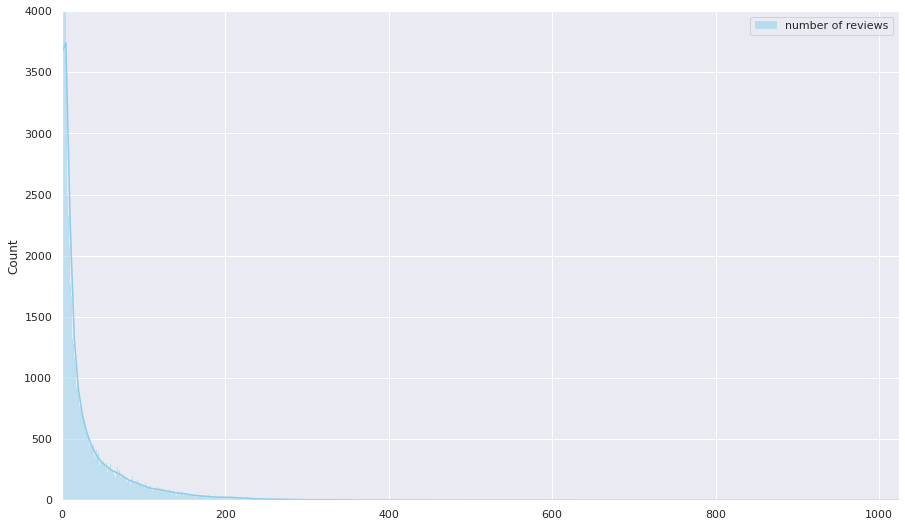

In [140]:
histogram('number of reviews', min_reviews, max_reviews, int(max_reviews), ylim= 4000)

In [141]:
reviews_serie = pd.Series(preds_new)
min_reviews = reviews_serie.quantile(0)
median_reviews = reviews_serie.quantile(0.5)
average_reviews = reviews_serie.mean()
max_reviews = reviews_serie.quantile(1)
print(f'Min: {min_reviews} Median: {median_reviews} Average: {average_reviews} Max : {max_reviews}')

Min: -14755531.349933859 Median: 27.872787608941053 Average: -28736.12378340079 Max : 57.05719432572664


Se puede observar que la mayoria de inmuebles se encuentran en valores menores a 30, por lo tanto la gran mayoria de inmubles son impopulares y esto me hace pensar que un buen valor para decir que un imueble impopular es ek que tiene menos de 28 reviews pues esta es la mediana de los inmuebles nuevos y se estaria tomando en cuenta la mayoria de inmuebles no populares.

In [157]:
estate_to_advertise = new_estate_df.iloc[np.where(reviews_serie < 28)]
print(f"El total a pagar es de {estate_to_advertise['price'].sum()*0.02} dolares")

El total a pagar es de 2294.9498000000003 dolares


Segun el analisis el total a invertir en anuncios de la inmobilaria de los alpes es de casi 2300 dolares que es un 2% del valor de todos los inmuebles con una predicción de menos de 27.

Cabe recalcar que el modelo predictivo no es el mejor y se deberia mejorar antes de tomar una decisión concreta de cuanto invertir.